In [27]:
import numpy as np
import matplotlib.pyplot as plt

Generated array of points :


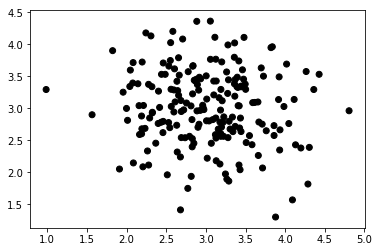

In [28]:
points = []

num_points = 200
num_clusters = 2 #binary

points_start_center = [3., 3.]
std = 0.6


for i in range(num_points):
    x_i = np.random.normal(loc=points_start_center[0], scale=std)
    y_i = np.random.normal(loc=points_start_center[1], scale=std)
    points.append([x_i, y_i, -1])


null_color = 'k'
colors_types = ['r', 'g', 'b', 'y', 'm']
colors = [null_color] * num_points
    
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))   
print('Generated array of points :')
plt.scatter(x=points_x, y=points_y, c=colors)

In [47]:
from random import randrange
    
def input_points(points, defined_points_count) :
    print('Input {} defined points'.format(defined_points_count))
    for i in range(defined_points_count) :
        points[i][2] = randrange(2)
    return points


def output_points(points, message):
    print('\n{}'.format(message))
    points_x = list(map(lambda x: x[0], points))
    points_y = list(map(lambda x: x[1], points))
    defined_colors = list(map(lambda x: x[2], points))
    plt.scatter(x=points_x, y=points_y, c=defined_colors)


from math import pow, sqrt
    
def get_distance(point1, point2):
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]
    dx = x1 - x2
    dy = y1 - y2
    distance = sqrt(pow(dx, 2) + pow(dy, 2))
    return distance

In [59]:
def num_uncertain_points(points) :
    n = 0
    for i in range(num_points) :
        if points[i][2] == -1 :
            n += 1
    return n


def determine_points_belonging_to_clusters(points) :
    for i in range(num_points) :
            this_point = points[i]
            this_distances = []
            for j in range(num_points) :
                if j != i :
                    if points[j][2] != -1 :
                        this_distances.append([getDistance(this_point, points[j]), points[j][2], j])
                    
            this_distances.sort()
            cluster_attachment_defined = False
            cl = [0] * 2 #num_clusters
            j = 0
            while not cluster_attachment_defined :
                c = this_distances[j][1]
                cl[c] += 1
                if cl[c] >= knn :
                    points[this_distances[j][2]][2] = c
                    cluster_attachment_defined = True
            
    return points
    

In [62]:
def KNN(points, knn) :
    print('KNN start')
    output_points(points, 'Input data :')
    clusters_are_defined = False
    iteration = 0
    
    while not clusters_are_defined :
        if iteration == 10 : # esli ono zdohlo
            break
         
        if num_uncertain_points(points) == 0 :
            clusters_are_defined = True
        else :
            iteration += 1
            points = determine_points_belonging_to_clusters(points)
            output_points(points, 'iteration {}'.format(iteration))
        
        

Input 20 defined points
KNN start

Input data :

iteration 1

iteration 2

iteration 3

iteration 4

iteration 5

iteration 6

iteration 7

iteration 8

iteration 9

iteration 10


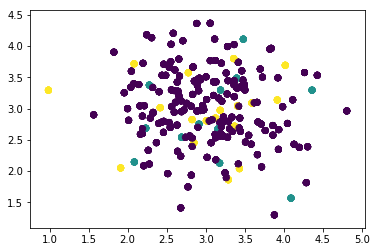

In [63]:
knn = 3
points = input_points(points, 20)
KNN(points, knn)